In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mne
from scipy.signal import welch

In [ ]:
# Load the participant metadata file
metadata_path = "participants.tsv"
metadata = pd.read_csv(metadata_path, sep="\t")  

print(metadata.head())

  participant_id Gender  Age Group  MMSE
0        sub-001      F   57     A    16
1        sub-002      F   78     A    22
2        sub-003      M   70     A    14
3        sub-004      F   67     A    20
4        sub-005      M   70     A    22


Text(0.5, 1.0, 'MMSE Distribution by Group')

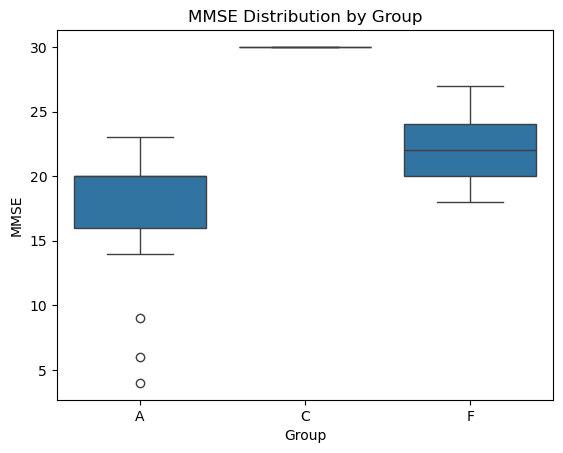

In [3]:
sns.boxplot(data=metadata, x='Group', y='MMSE')
plt.title('MMSE Distribution by Group')

In [4]:
metadata.groupby('Group')['MMSE'].describe()

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
A,36.0,17.750000,4.500000,4.0,16.0,20.0,20.0,23.0
C,29.0,30.000000,0.000000,30.0,30.0,30.0,30.0,30.0
F,23.0,22.173913,2.639769,18.0,20.0,22.0,24.0,27.0


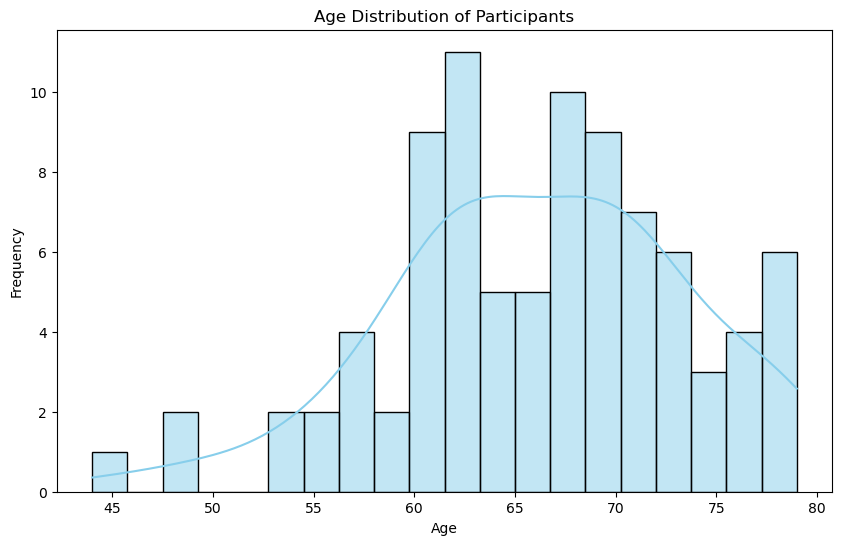

In [ ]:
ages = metadata['Age'] 

# Plotting the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(ages, kde=True, bins=20, color='skyblue')

plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Bin 1: Range(45, 50) - Count: 2
Bin 2: Range(50, 55) - Count: 2
Bin 3: Range(55, 60) - Count: 8
Bin 4: Range(60, 65) - Count: 25
Bin 5: Range(65, 70) - Count: 17
Bin 6: Range(70, 75) - Count: 21
Bin 7: Range(75, 80) - Count: 12


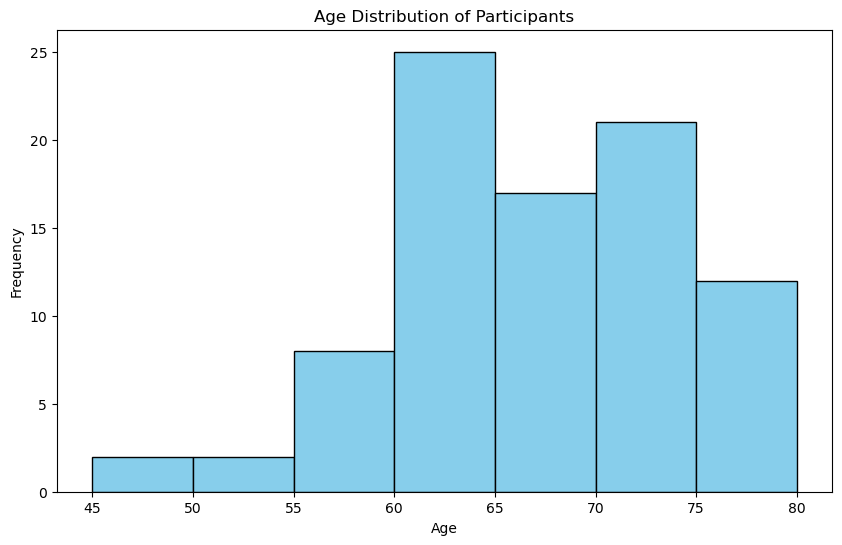

In [ ]:
# Define custom bin edges
bins = [45, 50, 55, 60, 65, 70, 75, 80]

# Compute the histogram with custom bins
counts, bin_edges = np.histogram(ages, bins=bins)


for i in range(len(counts)):
    print(f"Bin {i+1}: Range({bin_edges[i]}, {bin_edges[i+1]}) - Count: {counts[i]}")


plt.figure(figsize=(10, 6))
plt.hist(ages, bins=bins, edgecolor='black', color='skyblue')
plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(bins)  
plt.show()

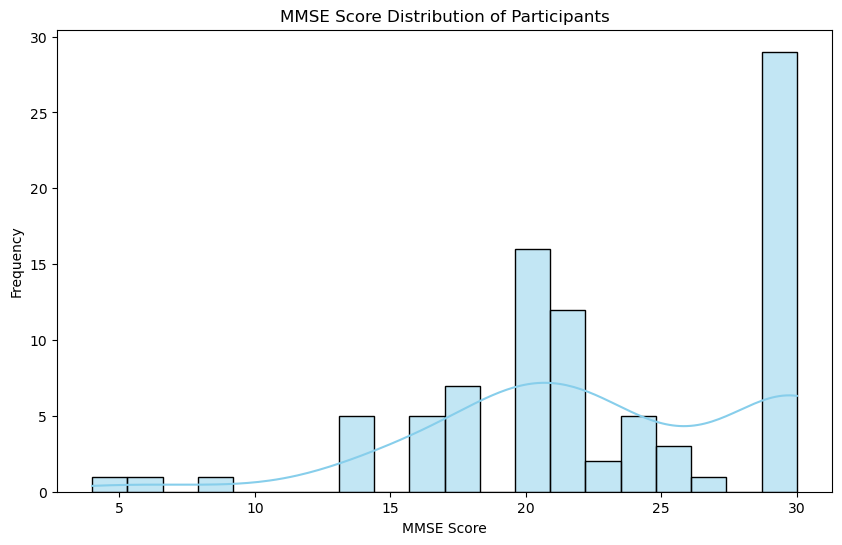

In [ ]:
mmse_score = metadata['MMSE']  

# Plotting the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(mmse_score, kde=True, bins=20, color='skyblue')

plt.title('MMSE Score Distribution of Participants')
plt.xlabel('MMSE Score')
plt.ylabel('Frequency')
plt.show()

Bin 1: Range(5, 10) - Count: 2
Bin 2: Range(10, 15) - Count: 5
Bin 3: Range(15, 20) - Count: 12
Bin 4: Range(20, 25) - Count: 35
Bin 5: Range(25, 30) - Count: 33


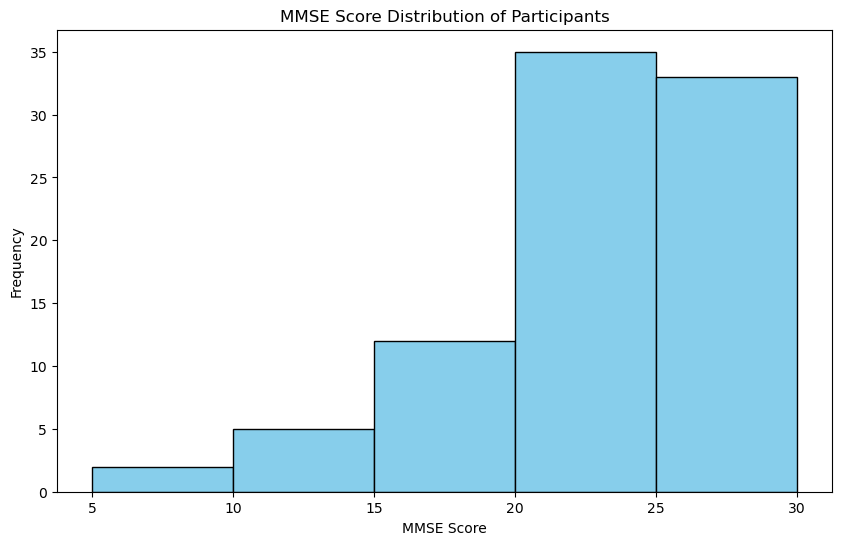

In [ ]:
# Define custom bin edges for MMSE scores
bins = [5, 10, 15, 20, 25, 30]

# Compute the histogram with custom bins
counts, bin_edges = np.histogram(mmse_score, bins=bins)

for i in range(len(counts)):
    print(f"Bin {i+1}: Range({bin_edges[i]}, {bin_edges[i+1]}) - Count: {counts[i]}")

# Plot the histogram for MMSE scores
plt.figure(figsize=(10, 6))
plt.hist(mmse_score, bins=bins, edgecolor='black', color='skyblue')
plt.title('MMSE Score Distribution of Participants')
plt.xlabel('MMSE Score')
plt.ylabel('Frequency')
plt.xticks(bins) 
plt.show()


In [ ]:
summary_stats = metadata.groupby('Group')['Age'].describe()[['mean', 'std', 'min', 'max']]

# Display the summary statistics of age by Group table
print(summary_stats)

            mean       std   min   max
Group                                 
A      66.388889  7.889515  49.0  79.0
C      67.896552  5.400693  57.0  78.0
F      63.652174  8.221970  44.0  78.0


In [7]:
age_stats = ages.describe()

print(age_stats)

count    88.000000
mean     66.170455
std       7.362879
min      44.000000
25%      61.750000
50%      67.000000
75%      71.000000
max      79.000000
Name: Age, dtype: float64


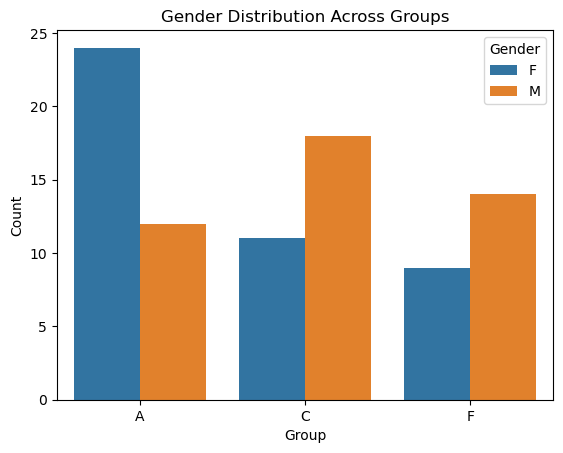

In [5]:
sns.countplot(data=metadata, x='Group', hue='Gender')
plt.title('Gender Distribution Across Groups')
plt.xlabel('Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

In [34]:
# Group by 'Group' and 'Gender' and count occurrences
gender_distribution = metadata.groupby(['Group', 'Gender']).size().unstack(fill_value=0)

# Display the gender distribution across groups
print(gender_distribution)

Gender   F   M
Group         
A       24  12
C       11  18
F        9  14


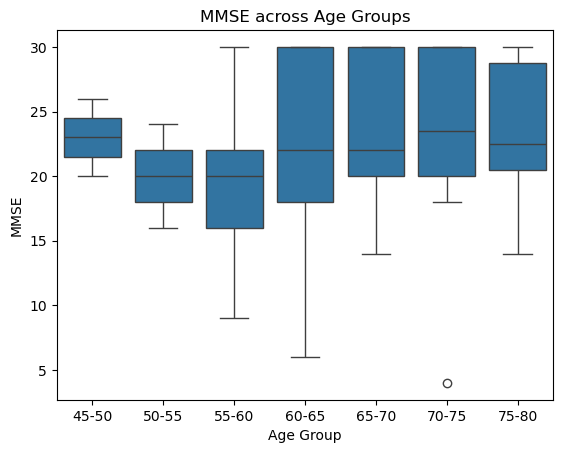

In [32]:
# Binning age into categories
bins = [45, 50, 55, 60, 65, 70, 75, 80]
labels = ['45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80']
metadata['age_group'] = pd.cut(metadata['Age'], bins=bins, labels=labels, right=True)

# Plot boxplot of MMSE for each age group
sns.boxplot(data=metadata, x='age_group', y='MMSE')
plt.title('MMSE across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('MMSE')
plt.show()


In [ ]:
# Group by age group and calculate summary statistics for MMSE
age_group_stats = metadata.groupby('age_group')['MMSE'].describe()

print(age_group_stats)


           count       mean       std   min   25%   50%    75%   max
age_group                                                           
45-50        2.0  23.000000  4.242641  20.0  21.5  23.0  24.50  26.0
50-55        3.0  20.000000  4.000000  16.0  18.0  20.0  22.00  24.0
55-60        9.0  19.222222  5.696002   9.0  16.0  20.0  22.00  30.0
60-65       25.0  23.080000  6.951738   6.0  18.0  22.0  30.00  30.0
65-70       22.0  23.909091  5.706380  14.0  20.0  22.0  30.00  30.0
70-75       16.0  23.562500  6.860211   4.0  20.0  23.5  30.00  30.0
75-80       10.0  23.600000  5.253570  14.0  20.5  22.5  28.75  30.0


/tmp/ipykernel_877/2070206710.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = metadata.groupby('age_group')['MMSE'].describe()


In [ ]:
# Path to the 'derivatives' folder
eeg_folder = './derivatives'

# List all the .set files in the folder
eeg_files = [f for f in os.listdir(eeg_folder) if f.endswith('.set')]

# Print the number of files found
print(f"Number of .set files found: {len(eeg_files)}")

# Print the filenames
print("Files found:", eeg_files)

Number of .set files found: 88
Files found: ['sub-031_task-eyesclosed_eeg.set', 'sub-063_task-eyesclosed_eeg.set', 'sub-024_task-eyesclosed_eeg.set', 'sub-008_task-eyesclosed_eeg.set', 'sub-066_task-eyesclosed_eeg.set', 'sub-057_task-eyesclosed_eeg.set', 'sub-030_task-eyesclosed_eeg.set', 'sub-059_task-eyesclosed_eeg.set', 'sub-013_task-eyesclosed_eeg.set', 'sub-041_task-eyesclosed_eeg.set', 'sub-056_task-eyesclosed_eeg.set', 'sub-062_task-eyesclosed_eeg.set', 'sub-004_task-eyesclosed_eeg.set', 'sub-002_task-eyesclosed_eeg.set', 'sub-017_task-eyesclosed_eeg.set', 'sub-028_task-eyesclosed_eeg.set', 'sub-046_task-eyesclosed_eeg.set', 'sub-042_task-eyesclosed_eeg.set', 'sub-052_task-eyesclosed_eeg.set', 'sub-068_task-eyesclosed_eeg.set', 'sub-011_task-eyesclosed_eeg.set', 'sub-023_task-eyesclosed_eeg.set', 'sub-084_task-eyesclosed_eeg.set', 'sub-082_task-eyesclosed_eeg.set', 'sub-032_task-eyesclosed_eeg.set', 'sub-048_task-eyesclosed_eeg.set', 'sub-070_task-eyesclosed_eeg.set', 'sub-025_t

In [ ]:
# Define frequency bands (in Hz)
frequency_bands = {
    'Delta': (0.5, 4),
    'Theta': (4, 8),
    'Alpha': (8, 13),
    'Beta': (13, 25),
    'Gamma': (25, 45)
}

# Function to calculate band power using Welch's method and relative power
def bandpower(data, sf, band, full_range=(0.5, 45), window_sec=4):
    freqs, psd = welch(data, sf, nperseg=window_sec*sf)
    
    # Compute the total PSD over the full range (0.5–45 Hz)
    full_range_freqs = np.logical_and(freqs >= full_range[0], freqs <= full_range[1])
    total_psd = np.sum(psd[:, full_range_freqs], axis=1)
    
    # Extract the PSD for the specific band
    band_freqs = np.logical_and(freqs >= band[0], freqs <= band[1])
    band_psd = np.sum(psd[:, band_freqs], axis=1)
    
    # Return the relative power for the band
    return np.mean(band_psd / total_psd)  # Relative power for the band

# Function to extract band power features with epochs
def extract_band_power_features(eeg_folder, epoch_duration=4, overlap=0.5):
    eeg_files = [f for f in os.listdir(eeg_folder) if f.endswith('.set')]
    all_band_power_features = []

    for eeg_file in eeg_files:
        file_path = os.path.join(eeg_folder, eeg_file)
        
        # Load the EEG data using MNE
        eeg_data = mne.io.read_raw_eeglab(file_path, preload=True)
        sfreq = eeg_data.info['sfreq']
        data = eeg_data.get_data()  # Shape: (n_channels, n_timepoints)

        # Define epoch parameters
        samples_per_epoch = int(epoch_duration * sfreq)
        step_samples = int(samples_per_epoch * (1 - overlap))

        # Create epochs manually
        num_epochs = (data.shape[1] - samples_per_epoch) // step_samples + 1
        band_powers_per_epoch = []

        for i in range(num_epochs):
            start = i * step_samples
            end = start + samples_per_epoch
            epoch_data = data[:, start:end]  # (n_channels, samples_per_epoch)

            # Compute band power for each epoch
            band_powers = []
            for band_name, (low, high) in frequency_bands.items():
                band_powers.append(bandpower(epoch_data, sfreq, (low, high)))

            # Store each epoch's band power
            band_powers_per_epoch.append(np.hstack(band_powers))

        # Average over all epochs to get one value per participant
        avg_band_power = np.mean(band_powers_per_epoch, axis=0)

        # Get the participant ID from the filename
        participant_id = eeg_file.split('_')[0]  

        # Create a single row of features with participant ID and band power features
        band_power_features_with_id = np.hstack([[participant_id], avg_band_power.flatten()])

        # Append to the list
        all_band_power_features.append(band_power_features_with_id)

    # Convert to a DataFrame
    flattened_data = np.vstack(all_band_power_features)
    columns = ['Participant_ID'] + [f'{band}_relative_power' for band in frequency_bands.keys()]
    df_band_power_features = pd.DataFrame(flattened_data, columns=columns)

    return df_band_power_features

eeg_folder = './derivatives'  # Path to your EEG files
df_band_power_features = extract_band_power_features(eeg_folder)

In [ ]:
print(df_band_power_features.head())

  Participant_ID Delta_relative_power Theta_relative_power  \
0        sub-031   0.8915345525174794  0.05774847199798491   
1        sub-063   0.8912215240694364   0.0637263017691991   
2        sub-024   0.8844216923981858  0.08151175143968091   
3        sub-008   0.9068229915484124  0.05775329005418401   
4        sub-066   0.8747816967892087  0.07804377849572243   

   Alpha_relative_power   Beta_relative_power  Gamma_relative_power  
0  0.035002098969588336  0.015403787797169697  0.009911717891679859  
1   0.02878419048324135  0.017659026896929407   0.00959736853904609  
2  0.025622854749526726  0.014333218426259817  0.005696509367415686  
3  0.020197137146147175   0.01539350997179558  0.009583415633499244  
4    0.0329789183213142  0.015358844430739609  0.010431207595398662  


In [ ]:
# Ensure both DataFrames have matching column names for merging
metadata.rename(columns={'participant_id': 'Participant_ID'}, inplace=True)

# Merge the demographic data with the band power features DataFrame
final_df = pd.merge(df_band_power_features, metadata, on='Participant_ID', how='left')

# View the final df with demographic data
print(final_df.head())

  Participant_ID Delta_relative_power Theta_relative_power  \
0        sub-031   0.8915345525174794  0.05774847199798491   
1        sub-063   0.8912215240694364   0.0637263017691991   
2        sub-024   0.8844216923981858  0.08151175143968091   
3        sub-008   0.9068229915484124  0.05775329005418401   
4        sub-066   0.8747816967892087  0.07804377849572243   

   Alpha_relative_power   Beta_relative_power  Gamma_relative_power Gender  \
0  0.035002098969588336  0.015403787797169697  0.009911717891679859      F   
1   0.02878419048324135  0.017659026896929407   0.00959736853904609      M   
2  0.025622854749526726  0.014333218426259817  0.005696509367415686      F   
3  0.020197137146147175   0.01539350997179558  0.009583415633499244      M   
4    0.0329789183213142  0.015358844430739609  0.010431207595398662      M   

   Age Group  MMSE age_group  
0   67     A    22     65-70  
1   66     C    30     65-70  
2   69     A    20     65-70  
3   62     A    16     60-65  
4  

In [39]:
print(final_df.dtypes)

Participant_ID            object
Delta_relative_power      object
Theta_relative_power      object
Alpha_relative_power      object
Beta_relative_power       object
Gamma_relative_power      object
Gender                    object
Age                        int64
Group                     object
MMSE                       int64
age_group               category
dtype: object


In [42]:
frequency_bands = ['Delta_relative_power','Theta_relative_power','Alpha_relative_power','Beta_relative_power','Gamma_relative_power']
# Ensure all frequency band columns are numeric
final_df[frequency_bands] = final_df[frequency_bands].apply(pd.to_numeric, errors='coerce')

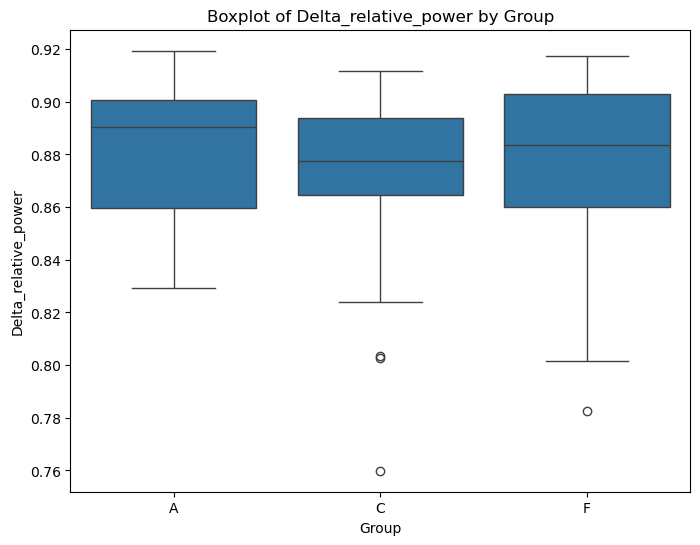

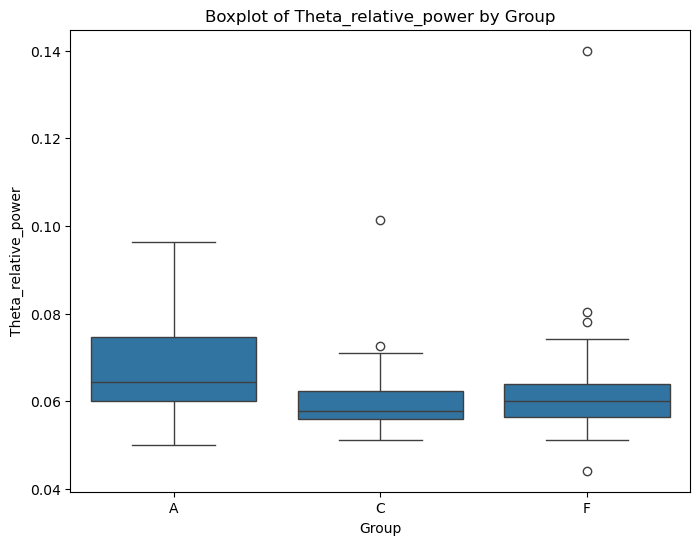

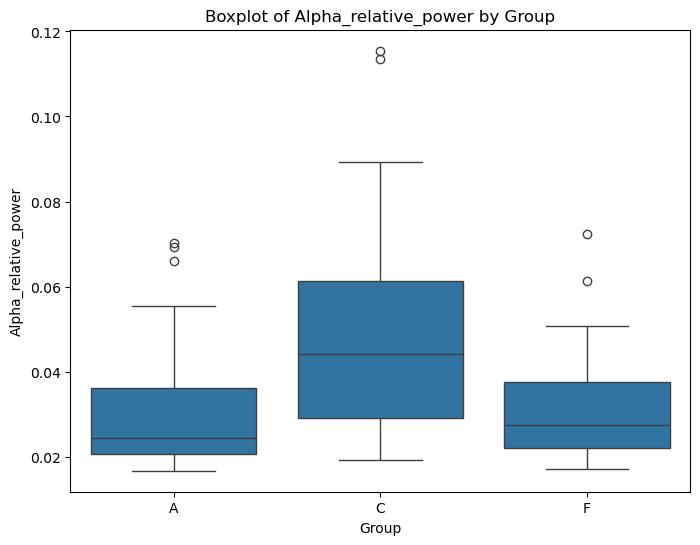

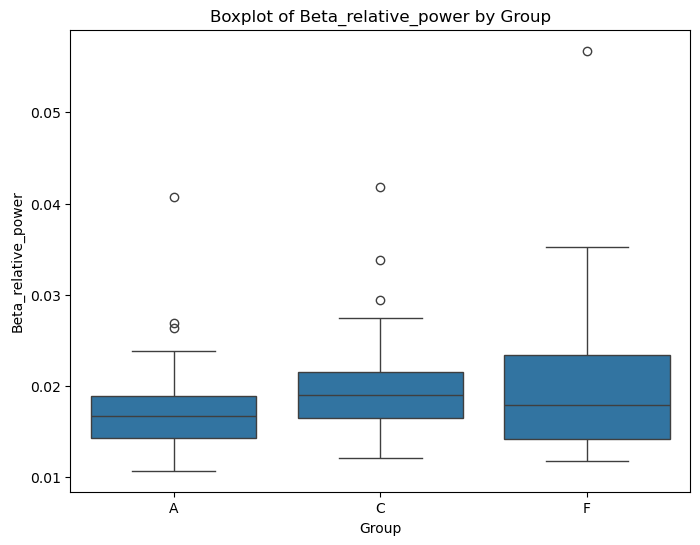

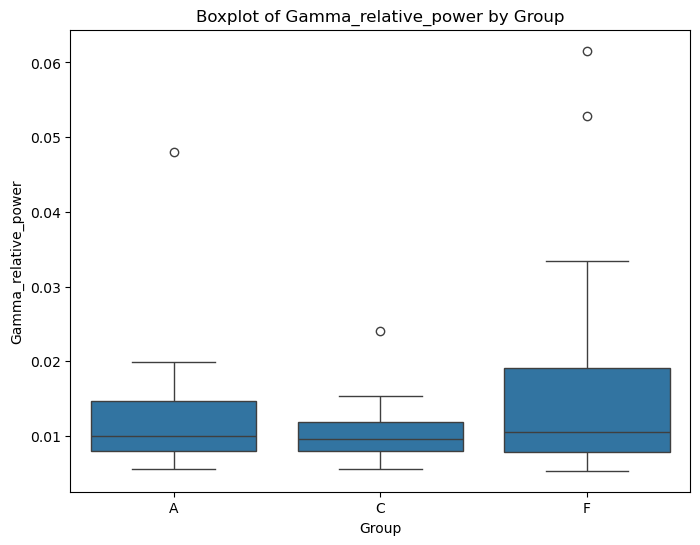

In [43]:

# Create a boxplot for each frequency band separately
for band in frequency_bands:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Group', y=band, data=final_df)
    plt.title(f'Boxplot of {band} by Group')
    plt.xlabel('Group')
    plt.ylabel(f'{band}')
    plt.show()

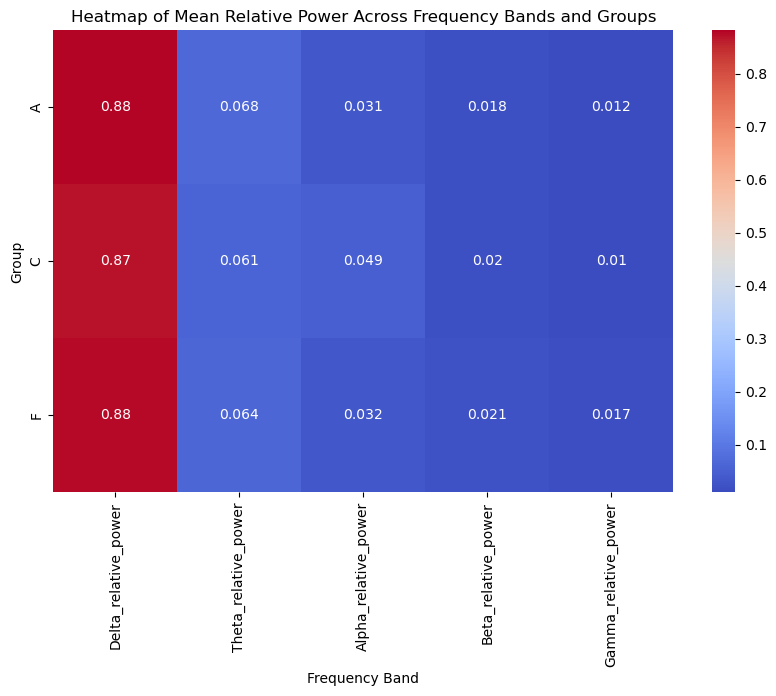

In [ ]:
# Create a heatmap of mean relative power across frequency bands for each group
heatmap_data = final_df.groupby('Group')[frequency_bands].mean()
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Mean Relative Power Across Frequency Bands and Groups')
plt.xlabel('Frequency Band')
plt.ylabel('Group')
plt.show()


In [45]:
print(heatmap_data)

       Delta_relative_power  Theta_relative_power  Alpha_relative_power  \
Group                                                                     
A                  0.882173              0.067997              0.030809   
C                  0.870906              0.060567              0.048772   
F                  0.876863              0.063898              0.031704   

       Beta_relative_power  Gamma_relative_power  
Group                                             
A                 0.017690              0.012184  
C                 0.020276              0.010366  
F                 0.021042              0.016860  


In [47]:
print(final_df.head())

  Participant_ID  Delta_relative_power  Theta_relative_power  \
0        sub-031              0.891535              0.057748   
1        sub-063              0.891222              0.063726   
2        sub-024              0.884422              0.081512   
3        sub-008              0.906823              0.057753   
4        sub-066              0.874782              0.078044   

   Alpha_relative_power  Beta_relative_power  Gamma_relative_power  Gender  \
0              0.035002             0.015404              0.009912       0   
1              0.028784             0.017659              0.009597       1   
2              0.025623             0.014333              0.005697       0   
3              0.020197             0.015394              0.009583       1   
4              0.032979             0.015359              0.010431       1   

   Age Group  MMSE age_group  
0   67     A    22     65-70  
1   66     C    30     65-70  
2   69     A    20     65-70  
3   62     A    16    

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

Leave-One-Participant-Out Accuracy: 0.7841


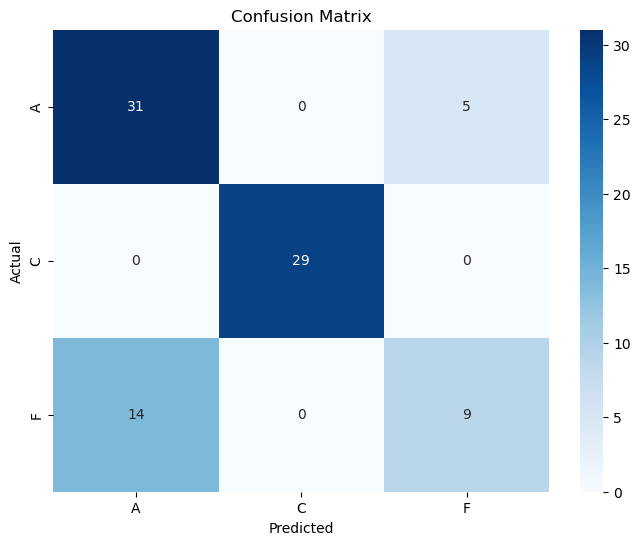

Classification Report:
              precision    recall  f1-score   support

           A       0.69      0.86      0.77        36
           C       1.00      1.00      1.00        29
           F       0.64      0.39      0.49        23

    accuracy                           0.78        88
   macro avg       0.78      0.75      0.75        88
weighted avg       0.78      0.78      0.77        88



In [ ]:
# 'Group' is the target column (with values A, F, C)
# 'Gender' column will be one-hot encoded
le_gender = LabelEncoder()
final_df['Gender'] = le_gender.fit_transform(final_df['Gender'])  # F=0, M=1

# Define the feature columns (everything except 'Participant_ID' and 'Group')
features_columns = [col for col in final_df.columns if col not in ['Participant_ID', 'Group','age_group']]

# Define the feature matrix (X) and the target vector (y)
X = final_df[features_columns].values  # Features (Band power values)
y = final_df['Group'].values  # Target (Group: A, F, or C)

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize Leave-One-Participant-Out Cross-Validation
loo = LeaveOneOut()

# To store the accuracy scores and predictions
accuracies = []
y_true = []
y_pred = []

# Loop through each fold
for train_idx, test_idx in loo.split(X, y):
    # Split data into training and test sets for this fold
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the model
    rf_clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_test_pred = rf_clf.predict(X_test)
    
    # Append the true and predicted values
    y_true.append(y_test)
    y_pred.append(y_test_pred)
    
    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_test, y_test_pred)
    accuracies.append(accuracy)

# Calculate overall accuracy
overall_accuracy = sum(accuracies) / len(accuracies)
print(f"Leave-One-Participant-Out Accuracy: {overall_accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred))


In [ ]:
# 'Group' is the target column (with values A, F, C)
# 'Gender' column will be one-hot encoded

le_gender = LabelEncoder()
final_df['Gender'] = le_gender.fit_transform(final_df['Gender'])  # F=0, M=1
# Extract features and target
X = final_df.drop(columns=['Participant_ID', 'Group', 'age_group'])  # Features (Band power values)
y = final_df['Group']  # Target (Group: A, F, or C)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target labels (A, F, C) to numeric values
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize MLP classifier
# mlp = MLPClassifier(hidden_layer_sizes=(200,), max_iter=500, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(200,),  
                    activation='relu',  
                    solver='sgd',  
                    alpha=0.01,  # L2 regularization
                    learning_rate_init=0.005,
                    momentum=0.95,  
                    max_iter=1000,  # Allow more training iterations
                    random_state=42)


# Leave-One-Participant-Out Cross-Validation
loo = LeaveOneOut()
accuracies = []
conf_matrix = np.zeros((3, 3))  # Assuming 3 classes: A, F, C

# Define the class labels (after encoding)
labels = le.classes_

In [ ]:
# Before the loop
all_y_true = []
all_y_pred = []

for train_idx, test_idx in loo.split(X_scaled, y_encoded):
    # Split data into training and test sets
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]
    
    # Train the model
    mlp.fit(X_train, y_train)
    
    # Make predictions
    y_pred = mlp.predict(X_test)
    
    y_test_labels = le.inverse_transform(y_test)  # Convert back to original labels (A, F, C)
    y_pred_labels = le.inverse_transform(y_pred)  # Convert predicted labels to original labels
    
    # Evaluate accuracy for this fold
    accuracies.append(accuracy_score(y_test_labels, y_pred_labels))
    
    # Update the confusion matrix
    conf_matrix += confusion_matrix(y_test_labels, y_pred_labels, labels=labels)

    all_y_true.extend(y_test_labels)
    all_y_pred.extend(y_pred_labels)

# Calculate overall accuracy
overall_accuracy = sum(accuracies) / len(accuracies)
print(f"Leave-One-Participant-Out Accuracy: {overall_accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")


# Calculate accuracy per class
class_accuracies = {}
for i, label in enumerate(labels):
    tp = conf_matrix[i, i]
    fn = np.sum(conf_matrix[i, :]) - tp
    accuracy = tp / (tp + fn)  # Accuracy for class i
    class_accuracies[label] = accuracy

# Print accuracy per class
for label, accuracy in class_accuracies.items():
    print(f"Accuracy for class {label}: {accuracy:.4f}")

# Print overall classification report
print("\nClassification Report:")
print(classification_report(all_y_true, all_y_pred, labels=labels))

Leave-One-Participant-Out Accuracy: 0.7614
Confusion Matrix:
[[52.  0. 20.]
 [ 0. 58.  0.]
 [20.  2. 24.]]
Accuracy for class A: 0.7222
Accuracy for class C: 1.0000
Accuracy for class F: 0.5217

Classification Report:
              precision    recall  f1-score   support

           A       0.72      0.72      0.72        36
           C       0.97      1.00      0.98        29
           F       0.55      0.52      0.53        23

    accuracy                           0.76        88
   macro avg       0.74      0.75      0.75        88
weighted avg       0.76      0.76      0.76        88



In [ ]:
y_true_mlp = all_y_true  # true labels for MLP
y_pred_mlp = all_y_pred  # predicted labels for MLP

report_mlp = classification_report(y_true_mlp, y_pred_mlp, labels=labels, output_dict=True)

# Extract the metrics from the report:
accuracy_mlp = report_mlp['accuracy'] * 100
precision_mlp = report_mlp['weighted avg']['precision'] * 100
recall_mlp = report_mlp['weighted avg']['recall'] * 100
f1_mlp = report_mlp['weighted avg']['f1-score'] * 100

print(f"MLP Accuracy: {accuracy_mlp:.2f}%")
print(f"MLP Precision: {precision_mlp:.2f}%")
print(f"MLP Recall: {recall_mlp:.2f}%")
print(f"MLP F1-Score: {f1_mlp:.2f}%")

MLP Accuracy: 76.14%
MLP Precision: 75.66%
MLP Recall: 76.14%
MLP F1-Score: 75.88%


In [10]:
df_ac = final_df[final_df['Group'].isin(['A', 'C'])].reset_index(drop=True)
df_fc = final_df[final_df['Group'].isin(['F', 'C'])].reset_index(drop=True)
df_af = final_df[final_df['Group'].isin(['A', 'F'])].reset_index(drop=True)

In [13]:
def run_loocv_classification(df_subset, title=""):
    from sklearn.metrics import classification_report

    X = df_subset.drop(columns=['Participant_ID', 'Group'])
    y = df_subset['Group']

    # Scale
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Encode labels
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    labels = le.classes_

    mlp = MLPClassifier(
        hidden_layer_sizes=(200,),
        activation='relu',
        solver='sgd',
        alpha=0.01,
        learning_rate_init=0.001,
        momentum=0.95,
        max_iter=5000,
        random_state=42
    )

    loo = LeaveOneOut()
    accuracies = []
    conf_matrix = np.zeros((len(labels), len(labels)), dtype=int)
    y_true_all = []
    y_pred_all = []

    for train_idx, test_idx in loo.split(X_scaled, y_encoded):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)

        accuracies.append(int(y_pred[0] == y_test[0]))
        y_true_all.append(y_test[0])
        y_pred_all.append(y_pred[0])

        conf_matrix += confusion_matrix(
            [le.inverse_transform([y_test[0]])[0]],
            [le.inverse_transform([y_pred[0]])[0]],
            labels=labels
        )

    print(f"\n===== {title} =====")
    print(f"Leave-One-Participant-Out Accuracy: {np.mean(accuracies):.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print("\nClassification Report:")
    print(classification_report(
        le.inverse_transform(y_true_all),
        le.inverse_transform(y_pred_all),
        labels=labels
    ))


In [14]:
run_loocv_classification(df_ac, title="A vs C")
run_loocv_classification(df_fc, title="F vs C")
run_loocv_classification(df_af, title="A vs F")


===== A vs C =====
Leave-One-Participant-Out Accuracy: 0.9846
Confusion Matrix:
[[36  0]
 [ 1 28]]

Classification Report:
              precision    recall  f1-score   support

           A       0.97      1.00      0.99        36
           C       1.00      0.97      0.98        29

    accuracy                           0.98        65
   macro avg       0.99      0.98      0.98        65
weighted avg       0.99      0.98      0.98        65


===== F vs C =====
Leave-One-Participant-Out Accuracy: 0.9808
Confusion Matrix:
[[29  0]
 [ 1 22]]

Classification Report:
              precision    recall  f1-score   support

           C       0.97      1.00      0.98        29
           F       1.00      0.96      0.98        23

    accuracy                           0.98        52
   macro avg       0.98      0.98      0.98        52
weighted avg       0.98      0.98      0.98        52


===== A vs F =====
Leave-One-Participant-Out Accuracy: 0.7119
Confusion Matrix:
[[28  8]
 [ 9 14]